In [1]:
import torch
from torch import nn
import numpy as np
from torch.distributions import Normal, Laplace
import matplotlib.pyplot as plt
from torch import optim
from tqdm import tqdm

import seaborn as sns

In [2]:
# https://github.com/pytorch/pytorch/issues/47841
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.binom.html
def torch_binom(n, v):
    #mask = n.detach() >= v.detach()
    #n = mask * n
    #v = mask * v
    a = torch.lgamma(n + 1) - torch.lgamma((n - v) + 1) - torch.lgamma(v + 1)
    return torch.exp(a)# * mask

In [3]:
# https://en.wikipedia.org/wiki/Bernstein_polynomial
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BPoly.html
def b(v, n, x):
    return torch_binom(n, v) * x**v * (1 - x)**(n - v)

In [4]:
torch_binom(n=torch.tensor([5]), v=torch.tensor([2]))#10
torch_binom(n=torch.tensor([10]), v=torch.tensor([2]))#45
torch_binom(n=torch.tensor([1]), v=torch.tensor([1]))#1

tensor([1.])

In [5]:
b(v = torch.tensor([2]),
  n = torch.tensor([5]),
  x = torch.tensor([10]))

tensor([-729000.])

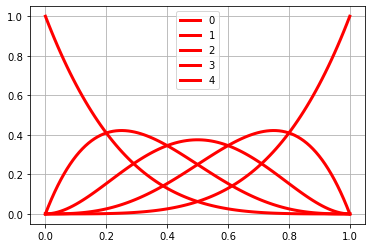

In [6]:
x_space = torch.tensor(np.linspace(0, 1, 100))
n=4

fig, ax = plt.subplots()

for v in range(n+1):
    ax.plot(x_space, b(v = torch.tensor([v]),n = torch.tensor([n]), x = x_space), 'r-', lw=3, label=str(v))

ax.grid(True)
ax.legend(loc='best')
plt.show()

In [7]:
n = torch.tensor([5])
x = torch.tensor([10])
params = torch.tensor([1.5,1.5,1.5,1.5,1.5], requires_grad=True)
true = torch.tensor([1])

prediction = sum(params[v-1] * b(torch.tensor([v]), n, x) for v in range(n+1))

loss = true - prediction

In [8]:
def bernstein_prediction(params, input, degree):
    n = degree
    return sum(params[v] * b(torch.FloatTensor([v]), torch.FloatTensor([n]), input) for v in range(n+1))

In [9]:
#def bernstein_inverse(params, input, degree):
#    n = degree
#    k = 1
#    return 1 / torch_binom(torch.FloatTensor([n]), torch.FloatTensor([k])) * \
#           sum(1 / params[j-1] * torch_binom(torch.FloatTensor([j]), torch.FloatTensor([k])) * b(torch.FloatTensor([j]), torch.FloatTensor([n]), input) for j in range(k,n+1))

In [10]:
x = torch.FloatTensor([1])
p = torch.ones(6,dtype=torch.float)
d = 5

z = bernstein_prediction(params=p, input=x, degree=d)
x_2 = bernstein_inverse(params=p, input=z, degree=d)

x_2

NameError: name 'bernstein_inverse' is not defined

In [ ]:
x = torch.FloatTensor(np.linspace(0,1,100))
p = torch.FloatTensor([1,2,3,4,5,6])
d = 5

z = bernstein_prediction(params=p, input=x, degree=d)
x_2 = bernstein_inverse(params=p, input=z, degree=d)

In [ ]:
x_2

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x, 'r-', lw=3, label="x")
ax.plot(x, x_2, 'r-', lw=3, label="x_2")

ax.grid(True)
ax.legend(loc='best')
plt.show()

In [ ]:
stop

In [ ]:
5 ** 1

In [ ]:
torch.FloatTensor([1])

In [ ]:
list(range(5,10))

In [ ]:
loss.backward()
print(params.grad)

In [ ]:
print(loss.grad)

In [ ]:
np.repeat(0.1,5)

In [ ]:
a = torch.FloatTensor([[1,2],[2,2]]).size(1)

In [ ]:
a = torch.FloatTensor(np.repeat(np.linspace(0,1/7,7),2))
a = torch.reshape(a, (7, 2))

In [ ]:
a

In [ ]:
torch.zeros(a.size())

In [ ]:
p = torch.FloatTensor(np.linspace(-1,0,7))
p[1:] = torch.abs(p[1:])
p @ torch.triu(torch.ones(7,7))

In [106]:
from scipy.interpolate import BPoly
x = [0, 1]
c = [[1], [2], [3]]
bp = BPoly(c, x)
bp.__call__(np.array([0, 0.5, 1]))
x = [4, 6]
c = [[1], [2], [3]]
bp = BPoly(c, x)
bp.__call__(np.array([4, 5, 6]))

array([1., 2., 3.])

In [109]:
bernstein_prediction(params_a=torch.FloatTensor([[1], [2], [3]]),
                     input_a=torch.FloatTensor([0, 0.5, 1]),
                     degree=2,
                     monotonically_increasing=False)

bernstein_prediction(params_a=torch.FloatTensor([[1], [2], [3]]),
                     input_a=torch.FloatTensor([4, 5, 6]),
                     degree=2,
                     monotonically_increasing=False)

tensor([ 9., 11., 13.])

In [166]:
mctm = Transformation(degree=10, number_variables=2, min_val=torch.FloatTensor([-19,-19]), max_val=torch.FloatTensor([32,32]))

In [167]:
mctm.params[:,0].size()
#mctm.params[1:,0].size()

torch.Size([11])

In [168]:
mctm.params[:,0]

tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       grad_fn=<SelectBackward0>)

In [169]:
a = mctm.params.clone()
a[1:,0] = torch.exp(mctm.params[1:,0]) @ torch.triu(torch.ones(10+1-1,10+1-1)) + mctm.params[1,0]
a[1:,1] = torch.exp(mctm.params[1:,1]) @ torch.triu(torch.ones(10+1-1,10+1-1)) + mctm.params[1,1]
a

tensor([[-1.0000, -1.0000],
        [-0.6321, -0.6321],
        [-0.2642, -0.2642],
        [ 0.1036,  0.1036],
        [ 0.4715,  0.4715],
        [ 0.8394,  0.8394],
        [ 1.2073,  1.2073],
        [ 1.5752,  1.5752],
        [ 1.9430,  1.9430],
        [ 2.3109,  2.3109],
        [ 2.6788,  2.6788]], grad_fn=<CopySlices>)

In [160]:
y.size()

torch.Size([2000, 2])

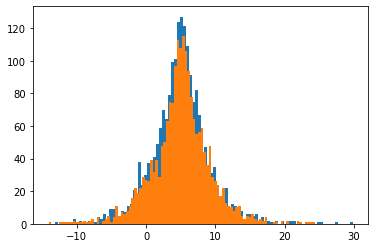

In [187]:
y_distribution = Laplace(5, 3)
y = y_distribution.sample((2000,2)) # Generate training data
plt.hist(y[:,0].numpy(), bins=100)
plt.hist(y[:,1].numpy(), bins=100)
plt.show()

In [163]:
y.max()

tensor(31.2892)

In [164]:
y.min()

tensor(-18.7891)

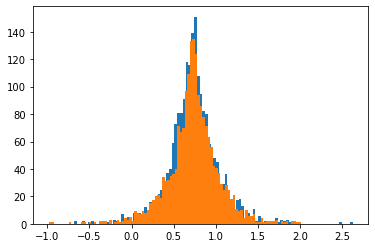

In [170]:
z, log_d = mctm.forward(y)
plt.hist(z[:,0].detach().numpy(), bins=100)
plt.hist(z[:,1].detach().numpy(), bins=100)
plt.show()

In [337]:
def bernstein_prediction(params_a, input_a, degree, min_val, max_val, monotonically_increasing=False, derivativ=0):
    # Restricts Monotonically increasing my insuring that params increase
    if monotonically_increasing:
        params_restricted = params_a.clone()
        #relu_obj = nn.ReLU()
        params_restricted[1:] = torch.exp(params_a[1:]) @ torch.triu(torch.ones(degree+1-1,degree+1-1)) + params_a[1] #abs or exp
        # cannot use exp as it destabilizes the optimisation using LBFGS, get inf for params fast?
        # however with exp works really well and fast with adam
        # Relu works for both, results are good except at lower end there is a cutoff somehow
    else:
        params_restricted = params_a.clone()
    n = degree
    #return sum((params[1] + sum(torch.abs(params[1:(v-1)]))) * b(torch.FloatTensor([v]), torch.FloatTensor([n]), input) for v in range(n+1))

    input_a = (input_a - min_val) / (max_val - min_val)

    #print(params_restricted)

    if derivativ == 0:
        return sum(params_restricted[v] * b(torch.FloatTensor([v]), torch.FloatTensor([n]), input_a) for v in range(n+1)) #before we had: params_restricted[v-1]
    elif derivativ == 1:
        return sum(params_restricted[v] * torch.FloatTensor([n]) * (b(torch.FloatTensor([v-1]), torch.FloatTensor([n-1]), input_a) -
                                    b(torch.FloatTensor([v]), torch.FloatTensor([n-1]), input_a)) for v in range(n+1))

def multivariable_bernstein_prediction(input, degree, number_variables, params, min_val, max_val, monotonically_increasing, derivativ=0):
    # input dims: 0: observation number, 1: variable
    # cloning tipp from here: https://discuss.pytorch.org/t/encounter-the-runtimeerror-one-of-the-variables-needed-for-gradient-computation-has-been-modified-by-an-inplace-operation/836/10
    output = input.clone()
    for var_num in range(number_variables):
        output[:,var_num] = bernstein_prediction(params[:,var_num], input[:,var_num], degree, min_val[var_num], max_val[var_num], monotonically_increasing, derivativ)
    return output

class Transformation(nn.Module):
    def __init__(self, degree, number_variables, min_val, max_val):
        super().__init__()
        self.degree  = degree
        self.number_variables = number_variables
        self.min_val = min_val
        self.max_val = max_val
        # param dims: 0: basis, 1: variable
        p = torch.FloatTensor(np.repeat(np.repeat(1,self.degree+1),self.number_variables))
        self.params = nn.Parameter(torch.reshape(p,(self.degree+1, self.number_variables)))

    def forward(self, input, log_d = 0, inverse = False, monotonically_increasing = True):
        # input dims: 0: observation number, 1: variable
        if not inverse:
            output = multivariable_bernstein_prediction(input, self.degree, self.number_variables, self.params, self.min_val, self.max_val, monotonically_increasing)
            output_first_derivativ = multivariable_bernstein_prediction(input, self.degree, self.number_variables, self.params, self.min_val, self.max_val, monotonically_increasing, derivativ=1)
            log_d = log_d + torch.log(torch.abs(output_first_derivativ)) # Error this is false we require the derivativ of the bernstein polynomial!332'
        else:
            output = multivariable_bernstein_prediction(input, self.degree, self.number_variables, self.params_inverse, self.min_val_inverse, self.max_val_inverse, monotonically_increasing=False)


        return output, log_d

    def approximate_inverse(self, input, min_val, max_val):
        # optimization using linespace data and the forward berstein polynomial

        self.min_val_inverse = min_val
        self.max_val_inverse = max_val

        #input_space = input
        #output_space = multivariable_bernstein_prediction(input_space, self.degree, self.number_variables, self.params, monotonically_increasing=True)

        inv_trans = Transformation(self.degree, self.number_variables, self.min_val_inverse, self.max_val_inverse)
        loss_mse = nn.MSELoss()
        opt_inv  = optim.Adam(inv_trans.parameters(), lr = 1e-2)
        scheduler_inv = optim.lr_scheduler.StepLR(opt_inv, step_size = 500, gamma = 0.8)
        l2_losses = []
        for _ in tqdm(range(4000)):

            # needs to be computed manually at each step
            input_space = input
            output_space = multivariable_bernstein_prediction(input_space, self.degree, self.number_variables, self.params, self.min_val, self.max_val, monotonically_increasing=True)

            opt_inv.zero_grad() # zero out gradients first on the optimizer
            input_space_pred, input_space_pred_log_d  = inv_trans.forward(output_space, inverse=False, monotonically_increasing=False)

            l2_loss = loss_mse(input_space_pred, input_space) # use the `objective` function

            l2_loss.backward() # backpropagate the loss
            opt_inv.step()
            scheduler_inv.step()
            l2_losses.append(l2_loss.detach().numpy())

        self.params_inverse = inv_trans.params

        with sns.axes_style('ticks'):
            plt.plot(l2_losses)
            plt.xlabel("Iteration")
            plt.ylabel("Loss")
        sns.despine(trim = True)


    def __repr__(self):
        return "Transformation(degree={degree:.2f}, params={params:.2f})".format(degree = self.degree, params = self.params)

In [185]:
def objective(y, mctm, avg = True):
    z, log_d = mctm(y)
    log_likelihood_latent = Normal(0, 1).log_prob(z) # log p_source(z)
    #print(log_likelihood_latent.size())
    #print(log_d.size())
    #print(log_d)
    if avg:
        loss = 1 / (z.size(0)*z.size(1)) * (- log_likelihood_latent - log_d).sum()
    else:
        loss = - log_likelihood_latent.sum() - log_d.sum()
    return loss

In [173]:
objective(y, mctm, avg = True)

tensor(1.6350, grad_fn=<MulBackward0>)

In [293]:
def optimize(y, mctm, objective, iterations = 2000):
    opt                 = optim.Adam(mctm.parameters(), lr = 1e-2)
    scheduler           = optim.lr_scheduler.StepLR(opt, step_size = 500, gamma = 0.8)
    neg_log_likelihoods = []
    for _ in tqdm(range(iterations)):
        opt.zero_grad() # zero out gradients first on the optimizer
        neg_log_likelihood = objective(y, mctm) # use the `objective` function
        neg_log_likelihood.backward() # backpropagate the loss
        opt.step()
        scheduler.step()
        neg_log_likelihoods.append(neg_log_likelihood.detach().numpy())
    return neg_log_likelihoods

In [281]:
def optimize(y, mctm, objective, iterations = 2000):
    opt = torch.optim.LBFGS(mctm.parameters())

    def closure():
        opt.zero_grad()
        neg_log_likelihood = objective(y, mctm) # use the `objective` function
        neg_log_likelihood.backward() # backpropagate the loss
        return neg_log_likelihood

    neg_log_likelihoods = []
    for _ in tqdm(range(iterations)):
        neg_log_likelihood = objective(y, mctm)
        opt.step(closure)
        neg_log_likelihoods.append(neg_log_likelihood.detach().numpy())
    return neg_log_likelihoods

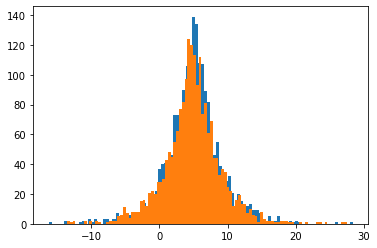

In [268]:
y_distribution = Laplace(5, 3)
y = y_distribution.sample((2000,2)) # Generate training data
plt.hist(y[:,0].numpy(), bins=100)
plt.hist(y[:,1].numpy(), bins=100)
plt.show()

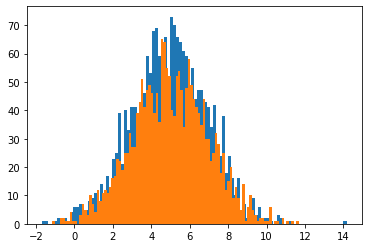

In [260]:
y_distribution = Normal(5, 2)
y = y_distribution.sample((2000,2)) # Generate training data
plt.hist(y[:,0].numpy(), bins=100)
plt.hist(y[:,1].numpy(), bins=100)
plt.show()

In [113]:
mctm = Transformation(degree=10, number_variables=2) # Initialize the affine flow model

In [331]:
mctm = Transformation(degree=10, number_variables=2, min_val=torch.FloatTensor([-20,-20]), max_val=torch.FloatTensor([35,35]))

In [193]:
mctm.params

Parameter containing:
tensor([[-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.]], requires_grad=True)

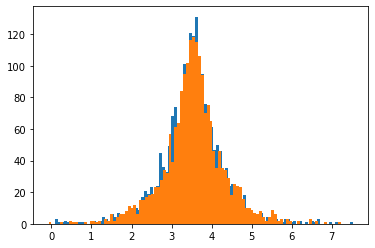

In [257]:
z, log_d = mctm.forward(y)
plt.hist(z[:,0].detach().numpy(), bins=100)
plt.hist(z[:,1].detach().numpy(), bins=100)
plt.show()

100%|██████████| 2000/2000 [00:26<00:00, 76.28it/s] 


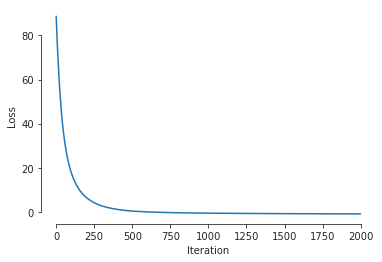

In [332]:
def train(mctm, train_data):

    neg_log_likelihoods = optimize(train_data, mctm, objective, iterations = 2000) # Run training

    # Plot neg_log_likelihoods over training iterations:
    with sns.axes_style('ticks'):
        plt.plot(neg_log_likelihoods)
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
    sns.despine(trim = True)

train(mctm, y)

In [92]:
#p = torch.FloatTensor(torch.ones(11))
#p2 = p.clone()
#p2[1:] = torch.exp(p[1:]) @ torch.triu(torch.ones(10,10)) + p[0]
#p2

tensor([ 1.0000,  3.7183,  6.4366,  9.1548, 11.8731, 14.5914, 17.3097, 20.0280,
        22.7463, 25.4645, 28.1828])

In [ ]:
#torch.abs(mctm.params[1:,0]) @ torch.triu(torch.ones(10,10)) + mctm.params[1,0]

In [ ]:
#torch.abs(mctm.params[1:,1]) @ torch.triu(torch.ones(10,10)) + mctm.params[1,1]

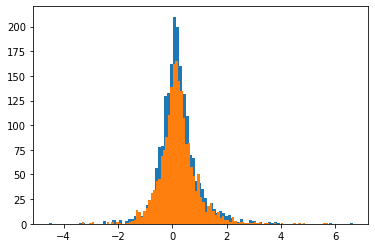

tensor([[2.2333, 2.0848],
        [2.1031, 2.4925],
        [2.0028, 2.1231],
        ...,
        [1.9766, 2.0064],
        [2.3102, 2.5001],
        [2.1721, 2.0397]], grad_fn=<AddBackward0>)


In [333]:
z, log_d = mctm.forward(y)
plt.hist(z[:,0].detach().numpy(), bins=100)
plt.hist(z[:,1].detach().numpy(), bins=100)
plt.show()
print(log_d)

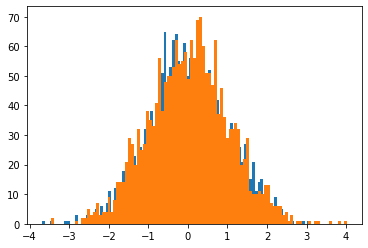

In [94]:
y_distribution = Normal(0, 1)
y = y_distribution.sample((2000,2)) # Generate training data
plt.hist(y[:,0].numpy(), bins=100)
plt.hist(y[:,1].numpy(), bins=100)
plt.show()

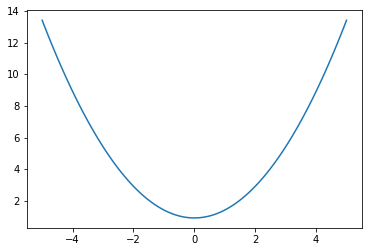

In [54]:
linespace_distr = - Normal(0, 1).log_prob(torch.FloatTensor(np.linspace(-5,5,100)))
plt.plot(np.linspace(-5,5,100),linespace_distr.numpy())

In [313]:
y

tensor([[ 6.2609,  3.3921],
        [ 3.8692, 11.5850],
        [ 1.4872, -5.2115],
        ...,
        [ 0.5509,  1.1018],
        [ 7.5691, 11.7469],
        [ 5.1789,  2.2201]])

100%|██████████| 2000/2000 [00:34<00:00, 57.44it/s]


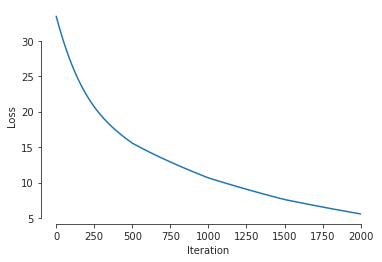

In [338]:
mctm.approximate_inverse(y, min_val= torch.FloatTensor([-7,-7]), max_val=torch.FloatTensor([7,7]))

In [321]:
mctm.params_inverse

Parameter containing:
tensor([[-14.2150, -14.6659],
        [-15.7871, -15.6973],
        [-11.3611, -12.0364],
        [ -5.4739,  -6.4136],
        [  1.4383,   0.8902],
        [  6.5837,   6.5564],
        [  9.2106,   9.2959],
        [ 10.6924,  10.7900],
        [ 11.6884,  11.8260],
        [ 12.5125,  12.7306],
        [ 13.5289,  13.5396]], requires_grad=True)

In [335]:
def evaluate(mctm):
    p_source = Normal(0, 1)
    p_target = Laplace(5, 3)
    x_true   = p_target.sample((2000, 2)) # samples to compare to

    # Generate samples from source distribution
    z = p_source.sample((2000, 2))

    # Use our trained model get samples from the target distribution
    x_flow, log_d = mctm.forward(z, inverse=True)

    # Plot histogram of training samples `x` and generated samples `x_flow` to compare the two.
    with sns.axes_style('ticks'):
        fig, ax = plt.subplots(figsize = (4,4), dpi = 150)
        ax.hist(x_true[:,0].detach().numpy().ravel(), bins = 50, alpha = 0.5,
                histtype = 'step', label = "true", density = True);
        ax.hist(x_flow[:,0].detach().numpy().ravel(), bins = 50, alpha = 0.5,
                histtype = 'step', label = "flow", density = True);
        plt.xlabel("x")
        plt.ylabel("Density")
        plt.legend(loc = "upper right")
    sns.despine(trim = True)

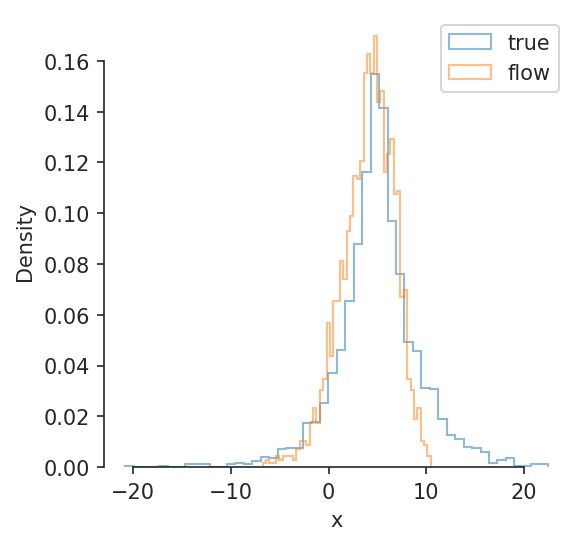

In [342]:
evaluate(mctm)

In [ ]:
class Decorrelation(nn.Module):
    def __init__(self):
        super().__init__()
        self.alpha = nn.Parameter(torch.FloatTensor(1).normal_())
        self.beta  = nn.Parameter(torch.FloatTensor(1).normal_())

    def forward(self, x, log_d = 0, inverse = False):
        if not inverse:
            z     = self.alpha * x + self.beta
            log_d = log_d + torch.log(torch.abs(self.alpha))
        else:
            z     = (x - self.beta) / self.alpha
            log_d = log_d + torch.log(torch.abs(self.alpha))
        return z, log_d

    def __repr__(self):
        return "Affine(alpha={alpha:.2f}, beta={beta:.2f})".format(alpha = self.alpha[0], beta = self.beta[0])